In [1]:
from math import exp,cos,sin
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve
from metodos import secante, newton_raphson, falsa_posicion, biseccion
import timeit

In [2]:
# funciones
f1 = lambda x: exp(-x**2) + cos(x)
f2 = lambda x: sin(x**2 + x + 1)
f3 = lambda x: x**(1/3) if x>=0 else -abs(x)**(1/3)

# derivadas de las funciones
f1_prima = lambda x: -2*x*exp(-x**2) - sin(x)
f2_prima = lambda x: (2*x+1)*cos(x**2 + x + 1)
f3_prima = lambda x: 0 if x==0 else (1/3)*abs(x)**(-2/3)

In [3]:
x = np.linspace(-2,2,100)

In [4]:
df = pd.DataFrame()

In [5]:
df["x"]=x

In [6]:
df["f1(x)"]=df["x"].apply(f1)
df["f2(x)"]=df["x"].apply(f2)
df["f3(x)"]=df["x"].apply(f3)

In [7]:
df

,x,f1(x),f2(x),f3(x)
0,-2.000000,-0.397831,0.141120,-1.259921
1,-1.959596,-0.357585,0.258213,-1.251379
2,-1.919192,-0.316250,0.368586,-1.242719
3,-1.878788,-0.273836,0.471099,-1.233936
4,-1.838384,-0.230346,0.564908,-1.225026
...,...,...,...,...
95,1.838384,-0.230346,-0.065100,1.225026
96,1.878788,-0.273836,0.125118,1.233936
97,1.919192,-0.316250,0.313906,1.242719
98,1.959596,-0.357585,0.493776,1.251379


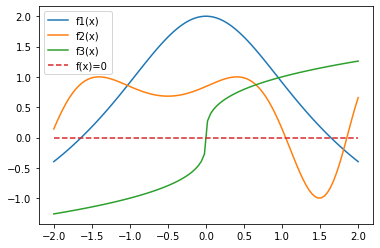

In [8]:
plt.plot(df["x"],df["f1(x)"],label="f1(x)")
plt.plot(df["x"],df["f2(x)"],label="f2(x)")
plt.plot(df["x"],df["f3(x)"],label="f3(x)")
plt.plot(df["x"],df["x"]*0,"--",label="f(x)=0")
plt.legend()

In [9]:
#Raices
raices_f1 = [fsolve(f1,-1.7),fsolve(f1,1.7)]
raices_f2 = [fsolve(f2,1.0),fsolve(f2,1.7)]
raices_f3 = [fsolve(f3,0)]

In [10]:
print(f"raices de f1:{len(raices_f1)},",raices_f1)
print(f"raices de f2:{len(raices_f2)},",raices_f2)
print(f"raices de f3:{len(raices_f3)},",raices_f3)

raices de f1:2, [array([-1.63898389]), array([1.63898389])]
raices de f2:2, [array([1.0464775]), array([1.85227237])]
raices de f3:1, [array([0.])]


In [11]:
epsilon = 10**-6
N_max = 100
c_f1=(1.,2.)
c_f2=(0.7,1.3)
c_f3= (-1,1)
c={1:c_f1,2:c_f2,3:c_f3}
f={1:f1,2:f2,3:f3}
f_={1:f1_prima,2:f2_prima,3:f3_prima}
#secante
c_se=[0,0,0]
vectorc_se=[0,0,0]
iteraciones_se=[0,0,0]
tipo_final_se=[0,0,0]
#newton
c_nr=[0,0,0]
vectorc_nr=[0,0,0]
iteraciones_nr=[0,0,0]
tipo_final_nr=[0,0,0]
#falsa posicion
c_fp=[0,0,0]
vectorc_fp=[0,0,0]
iteraciones_fp=[0,0,0]
tipo_final_fp=[0,0,0]
#biseccion
c_bi=[0,0,0]
vectorc_bi=[0,0,0]
iteraciones_bi=[0,0,0]
tipo_final_bi=[0,0,0]
for i in range(3):
    c_se[i], vectorc_se[i], iteraciones0_se[i],tipo_final_se[i] = secante(c[i+1][0],c[i+1][1], epsilon, N_max, f[i+1])
    tipo_final_se[i].append(timeit.timeit('secante(c[i+1][0],c[i+1][1], epsilon, N_max, f[i+1])',
                    setup='from __main__ import i,secante, c, epsilon, N_max, f',number=1))
    c_nr[i], vectorc_nr[i], iteraciones_nr[i],tipo_final_nr[i] = newton_raphson(c[i+1][0], epsilon, N_max, f[i+1], f_[i+1])
    tipo_final_nr[i].append(timeit.timeit('newton_raphson(c[i+1][0], epsilon, N_max, f[i+1], f_[i+1])',
                    setup='from __main__ import i,newton_raphson, c, epsilon, N_max, f, f_',number=1))
    c_fp[i], vectorc_fp[i], iteraciones_fp[i],tipo_final_fp[i] = falsa_posicion(c[i+1][0], c[i+1][1], epsilon, N_max, f[i+1])
    tipo_final_fp[i].append(timeit.timeit('falsa_posicion(c[i+1][0],c[i+1][1], epsilon, N_max, f[i+1])',
                    setup='from __main__ import i,falsa_posicion, c, epsilon, N_max, f',number=1))
    c_bi[i], vectorc_bi[i], iteraciones_bi[i],tipo_final_bi[i] = biseccion(c[i+1][0],c[i+1][1], epsilon, N_max, f[i+1])
    tipo_final_bi[i].append(timeit.timeit('biseccion(c[i+1][0],c[i+1][1], epsilon, N_max, f[i+1])',
                    setup='from __main__ import i,biseccion, c, epsilon, N_max, f',number=1))

In [12]:
df_funcion1 = pd.DataFrame()
df_funcion2 = pd.DataFrame()
df_funcion3 = pd.DataFrame()

In [13]:
df_funcion1["funcion f(x)"]=["f1","f1","f1","f1"]
df_funcion1["metodo"]=["secante","newton","falsa posicion","biseccion"]
df_funcion1["a_0"] = [c_f1[0],c_f1[0],c_f1[0],c_f1[0]]
df_funcion1["b_0"] = [c_f1[1],"--",c_f1[1],c_f1[1]]
df_funcion1["x_aprox"] = [c_se[0],c_nr[0],c_fp[0],c_bi[0]]
df_funcion1["n° iteraciones"] = [iteraciones_se[0],iteraciones_nr[0],iteraciones_fp[0],iteraciones_bi[0]]
df_funcion1["error 1"] = [tipo_final_se[0][0],tipo_final_nr[0][0],tipo_final_fp[0][0],tipo_final_bi[0][0]]
df_funcion1["error 2"] = [tipo_final_se[0][1],tipo_final_nr[0][1],tipo_final_fp[0][1],tipo_final_bi[0][1]]
df_funcion1["error 3"] = [tipo_final_se[0][2],tipo_final_nr[0][2],tipo_final_fp[0][2],tipo_final_bi[0][2]]
df_funcion1["tiempo"] =  [tipo_final_se[0][3],tipo_final_nr[0][3],tipo_final_fp[0][3],tipo_final_bi[0][3]]

In [14]:
df_funcion1

,funcion f(x),metodo,a_0,b_0,x_aprox,n° iteraciones,error 1,error 2,error 3,tiempo
0,f1,secante,1.0,2,1.638984,4,0,1,0,0.000151
1,f1,newton,1.0,--,1.638984,4,0,1,0,0.000173
2,f1,falsa posicion,1.0,2,1.638984,7,0,1,0,0.000248
3,f1,biseccion,1.0,2,1.638985,17,0,1,0,0.000436


In [15]:
df_funcion2["funcion f(x)"]=["f2","f2","f2","f2"]
df_funcion2["metodo"]=["secante","newton","falsa posicion","biseccion"]
df_funcion2["a_0"] = [c_f2[0],c_f2[0],c_f2[0],c_f2[0]]
df_funcion2["b_0"] = [c_f2[1],"--",c_f2[1],c_f2[1]]
df_funcion2["x_aprox"] = [c_se[1],c_nr[1],c_fp[1],c_bi[1]]
df_funcion2["n° iteraciones"] = [iteraciones_se[1],iteraciones_nr[1],iteraciones_fp[1],iteraciones_bi[1]]
df_funcion2["error 1"] = [tipo_final_se[1][0],tipo_final_nr[1][0],tipo_final_fp[1][0],tipo_final_bi[1][0]]
df_funcion2["error 2"] = [tipo_final_se[1][1],tipo_final_nr[1][1],tipo_final_fp[1][1],tipo_final_bi[1][1]]
df_funcion2["error 3"] = [tipo_final_se[1][2],tipo_final_nr[1][2],tipo_final_fp[1][2],tipo_final_bi[1][2]]
df_funcion2["tiempo"] =  [tipo_final_se[1][3],tipo_final_nr[1][3],tipo_final_fp[1][3],tipo_final_bi[1][3]]

In [16]:
df_funcion2

,funcion f(x),metodo,a_0,b_0,x_aprox,n° iteraciones,error 1,error 2,error 3,tiempo
0,f2,secante,0.7,1.3,1.046477,4,0,1,0,0.000158
1,f2,newton,0.7,--,1.046477,6,1,0,0,0.000266
2,f2,falsa posicion,0.7,1.3,1.046477,4,0,1,0,0.000163
3,f2,biseccion,0.7,1.3,1.046477,20,1,0,0,0.000563


In [17]:
df_funcion3["funcion f(x)"]=["f3","f3","f3","f3"]
df_funcion3["metodo"]=["secante","newton","falsa posicion","biseccion"]
df_funcion3["a_0"] = [c_f3[0],c_f3[0],c_f3[0],c_f3[0]]
df_funcion3["b_0"] = [c_f3[1],"--",c_f3[1],c_f3[1]]
df_funcion3["x_aprox"] = [c_se[2],c_nr[2],c_fp[2],c_bi[2]]
df_funcion3["n° iteraciones"] = [iteraciones_se[2],iteraciones_nr[2],iteraciones_fp[2],iteraciones_bi[2]]
df_funcion3["error 1"] = [tipo_final_se[2][0],tipo_final_nr[2][0],tipo_final_fp[2][0],tipo_final_bi[2][0]]
df_funcion3["error 2"] = [tipo_final_se[2][1],tipo_final_nr[2][1],tipo_final_fp[2][1],tipo_final_bi[2][1]]
df_funcion3["error 3"] = [tipo_final_se[2][2],tipo_final_nr[2][2],tipo_final_fp[2][2],tipo_final_bi[2][2]]
df_funcion3["tiempo"] =  [tipo_final_se[2][3],tipo_final_nr[2][3],tipo_final_fp[2][3],tipo_final_bi[2][3]]

In [18]:
df_funcion3

,funcion f(x),metodo,a_0,b_0,x_aprox,n° iteraciones,error 1,error 2,error 3,tiempo
0,f3,secante,-1,1,0.0,1,0,1,0,0.000064
1,f3,newton,-1,--,1.0,100,0,0,1,0.003897
2,f3,falsa posicion,-1,1,0.0,1,1,0,0,0.000058
3,f3,biseccion,-1,1,0.0,1,1,0,0,0.000040


In [19]:
df3=pd.concat([df_funcion1,df_funcion2,df_funcion3],axis=0)

In [20]:
df3

,funcion f(x),metodo,a_0,b_0,x_aprox,n° iteraciones,error 1,error 2,error 3,tiempo
0,f1,secante,1.0,2,1.638984,4,0,1,0,0.000151
1,f1,newton,1.0,--,1.638984,4,0,1,0,0.000173
2,f1,falsa posicion,1.0,2,1.638984,7,0,1,0,0.000248
3,f1,biseccion,1.0,2,1.638985,17,0,1,0,0.000436
0,f2,secante,0.7,1.3,1.046477,4,0,1,0,0.000158
1,f2,newton,0.7,--,1.046477,6,1,0,0,0.000266
2,f2,falsa posicion,0.7,1.3,1.046477,4,0,1,0,0.000163
3,f2,biseccion,0.7,1.3,1.046477,20,1,0,0,0.000563
0,f3,secante,-1.0,1,0.000000,1,0,1,0,0.000064
1,f3,newton,-1.0,--,1.000000,100,0,0,1,0.003897


In [146]:
df2 = pd.DataFrame()
df2["x"]=x
df2["f1'(x)"]=df2["x"].apply(f1_prima)
df2["f2'(x)"]=df2["x"].apply(f2_prima)
df2["f3'(x)"]=df2["x"].apply(f3_prima)

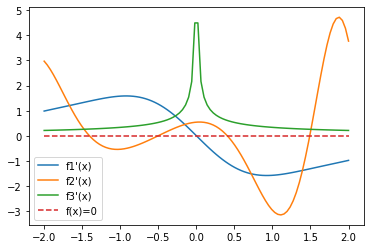

In [147]:
plt.plot(df2["x"],df2["f1'(x)"],label="f1'(x)")
plt.plot(df2["x"],df2["f2'(x)"],label="f2'(x)")
plt.plot(df2["x"],df2["f3'(x)"],label="f3'(x)")
plt.plot(df2["x"],df2["x"]*0,"--",label="f(x)=0")
plt.legend()